# Predictive Model for Customer Subscription

## 1. Business Problem
The main goal of this project is to build a predictive model to classify whether a customer will take up a sales offer or not. This will help to optimize marketing campaigns by targeting the right customers.

## 2. Data Loading and Initial Exploration

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
import pandas as pd

# Load the dataset
df = pd.read_csv('dataset.csv', sep='|')

# Display the first few rows
df.head()

,Feature_ae_0,Feature_dn_1,Feature_cn_2,Feature_ps_3,Feature_ps_4,Feature_ee_5,Feature_cx_6,Feature_cx_7,Feature_em_8,Feature_nd_9,...,Feature_md_11,Feature_ed_12,Feature_dd_13,Feature_hd_14,Feature_ld_15,Feature_cd_16,Feature_md_17,Feature_dd_18,Feature_pd_19,Response
0,57,371,1,999,1,-1.8,92.893,-46.2,1.299,5099.1,...,Cat_1_m***d,Cat_3_h***l,Cat_0_n***o,Cat_0_n***o,Cat_2_y***s,Cat_0_c***r,Cat_6_m***y,Cat_1_m***n,Cat_0_f***e,0
1,55,285,2,999,0,1.1,93.994,-36.4,4.860,5191.0,...,Cat_1_m***d,Cat_7_u***n,Cat_1_u***n,Cat_2_y***s,Cat_0_n***o,Cat_1_t***e,Cat_6_m***y,Cat_2_t***u,Cat_1_n***t,0
2,33,52,1,999,1,-1.8,92.893,-46.2,1.313,5099.1,...,Cat_1_m***d,Cat_2_b***y,Cat_0_n***o,Cat_0_n***o,Cat_0_n***o,Cat_0_c***r,Cat_6_m***y,Cat_0_f***i,Cat_0_f***e,0
3,36,355,4,999,0,1.4,94.465,-41.8,4.967,5228.1,...,Cat_1_m***d,Cat_3_h***l,Cat_0_n***o,Cat_0_n***o,Cat_0_n***o,Cat_1_t***e,Cat_4_j***n,Cat_0_f***i,Cat_1_n***t,0
4,27,189,2,999,0,1.4,93.918,-42.7,4.963,5228.1,...,Cat_1_m***d,Cat_3_h***l,Cat_0_n***o,Cat_2_y***s,Cat_0_n***o,Cat_0_c***r,Cat_3_j***l,Cat_0_f***i,Cat_1_n***t,0


In [3]:
# Get information about the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35000 entries, 0 to 34999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Feature_ae_0   35000 non-null  int64  
 1   Feature_dn_1   35000 non-null  int64  
 2   Feature_cn_2   35000 non-null  int64  
 3   Feature_ps_3   35000 non-null  int64  
 4   Feature_ps_4   35000 non-null  int64  
 5   Feature_ee_5   35000 non-null  float64
 6   Feature_cx_6   35000 non-null  float64
 7   Feature_cx_7   35000 non-null  float64
 8   Feature_em_8   35000 non-null  float64
 9   Feature_nd_9   35000 non-null  float64
 10  Feature_jd_10  35000 non-null  object 
 11  Feature_md_11  35000 non-null  object 
 12  Feature_ed_12  35000 non-null  object 
 13  Feature_dd_13  35000 non-null  object 
 14  Feature_hd_14  35000 non-null  object 
 15  Feature_ld_15  35000 non-null  object 
 16  Feature_cd_16  35000 non-null  object 
 17  Feature_md_17  35000 non-null  object 
 18  Featur

In [4]:
# Get summary statistics of the numerical columns
df.describe()

,Feature_ae_0,Feature_dn_1,Feature_cn_2,Feature_ps_3,Feature_ps_4,Feature_ee_5,Feature_cx_6,Feature_cx_7,Feature_em_8,Feature_nd_9,Response
count,35000.000000,35000.000000,35000.000000,35000.000000,35000.000000,35000.000000,35000.000000,35000.000000,35000.000000,35000.000000,35000.000000
mean,40.030571,257.838400,2.562200,962.432029,0.173714,0.080749,93.575801,-40.519114,3.619979,5167.038800,0.112286
std,10.428141,258.587889,2.767424,187.012184,0.495005,1.571101,0.578557,4.619948,1.734599,72.171997,0.315722
min,17.000000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000,0.000000
25%,32.000000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000,0.000000
50%,38.000000,179.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000,0.000000
75%,47.000000,318.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000,0.000000
max,98.000000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000,1.000000


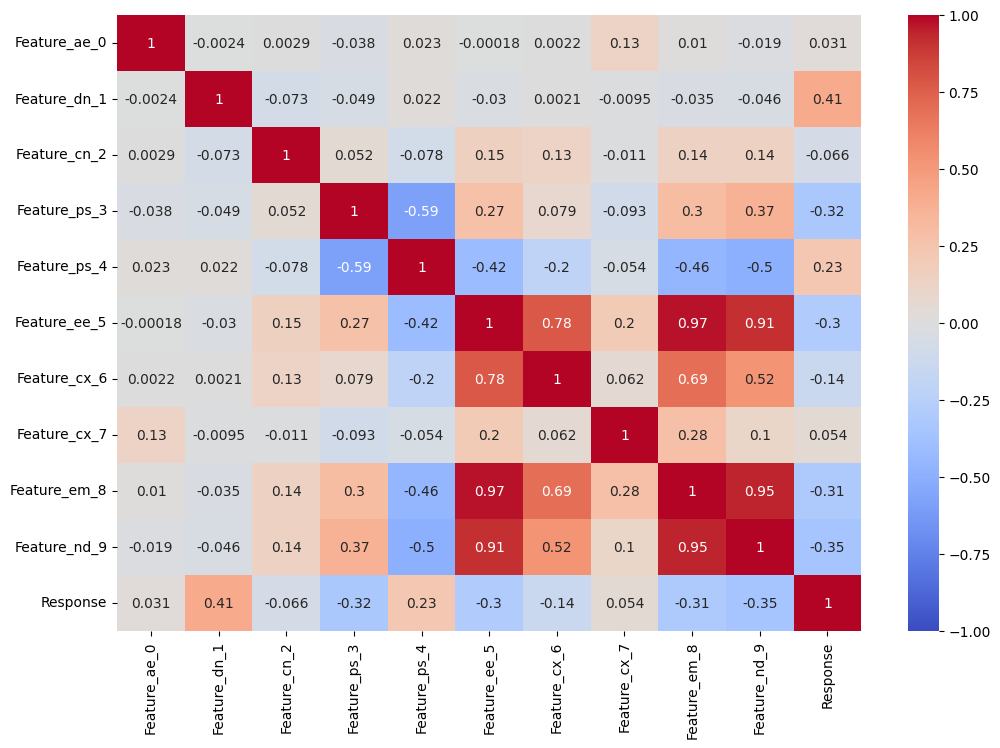

In [5]:
corr = df.corr(numeric_only=True)

plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True, cmap="coolwarm", vmin=-1, vmax=1)
plt.show()

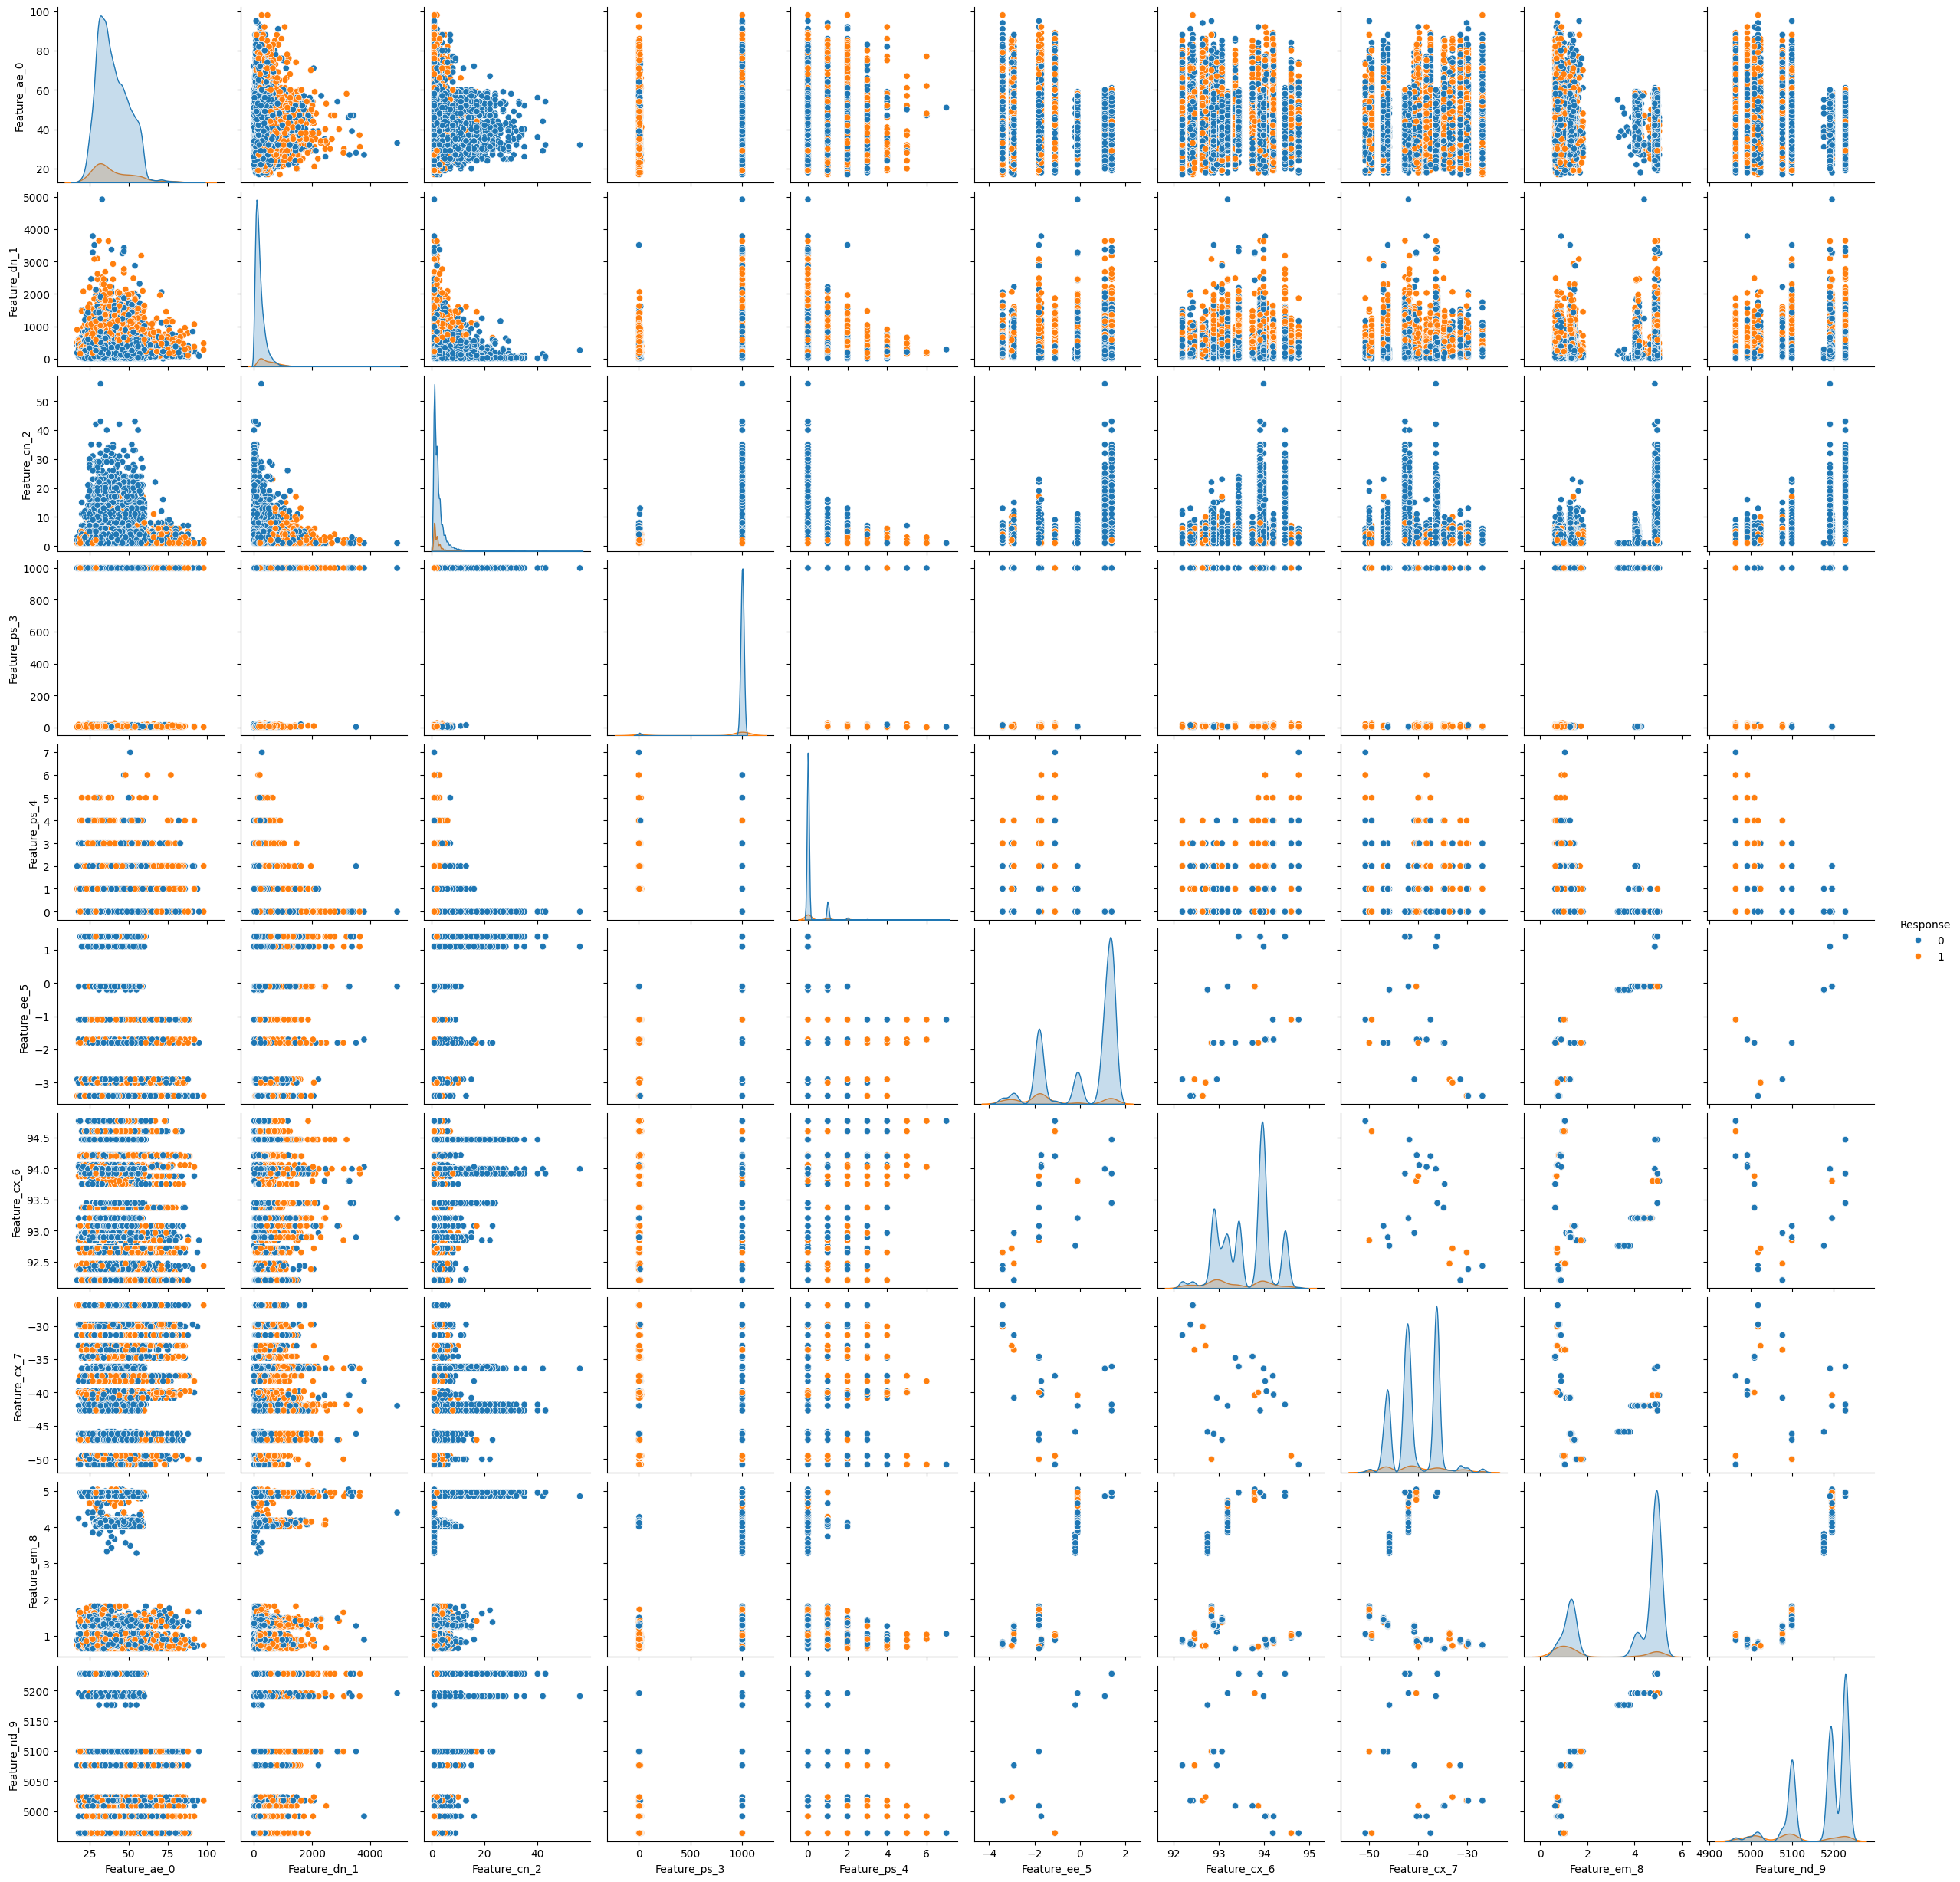

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select only numerical features
num_features = df.select_dtypes(include=['int64', 'float64']).columns

# Pairplot
sns.pairplot(df[num_features], hue='Response')
plt.show()

## 3. Data Cleaning and Preprocessing

### 3.1. Handling Missing Values

In [7]:
# Check for missing values
df.isnull().sum()

Feature_ae_0     0
Feature_dn_1     0
Feature_cn_2     0
Feature_ps_3     0
Feature_ps_4     0
Feature_ee_5     0
Feature_cx_6     0
Feature_cx_7     0
Feature_em_8     0
Feature_nd_9     0
Feature_jd_10    0
Feature_md_11    0
Feature_ed_12    0
Feature_dd_13    0
Feature_hd_14    0
Feature_ld_15    0
Feature_cd_16    0
Feature_md_17    0
Feature_dd_18    0
Feature_pd_19    0
Response         0
dtype: int64

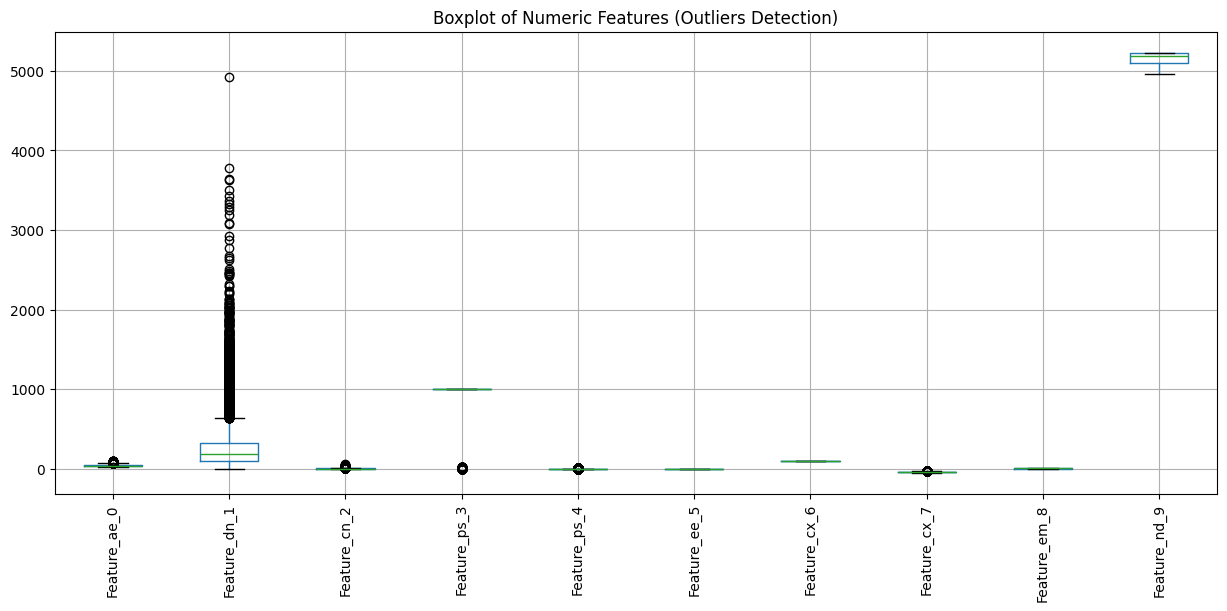

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

num_features = df.select_dtypes(include=['int64', 'float64']).columns.drop('Response', errors='ignore')

plt.figure(figsize=(15, 6))
df[num_features].boxplot(rot=90)
plt.title("Boxplot of Numeric Features (Outliers Detection)")
plt.show()

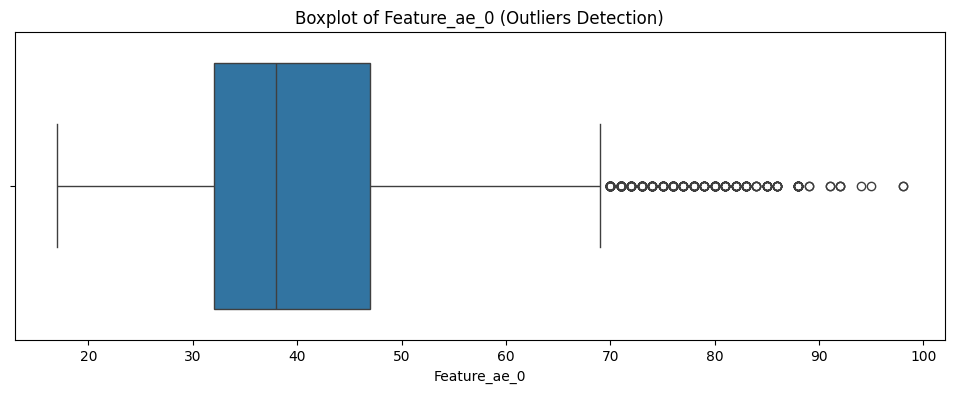

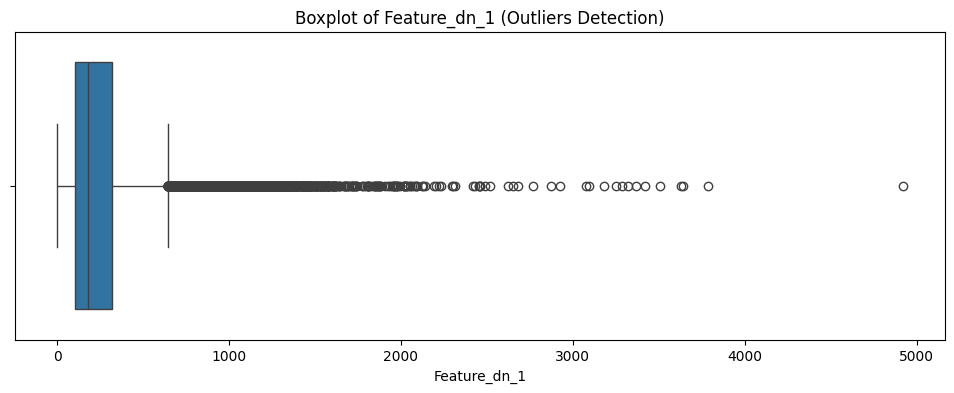

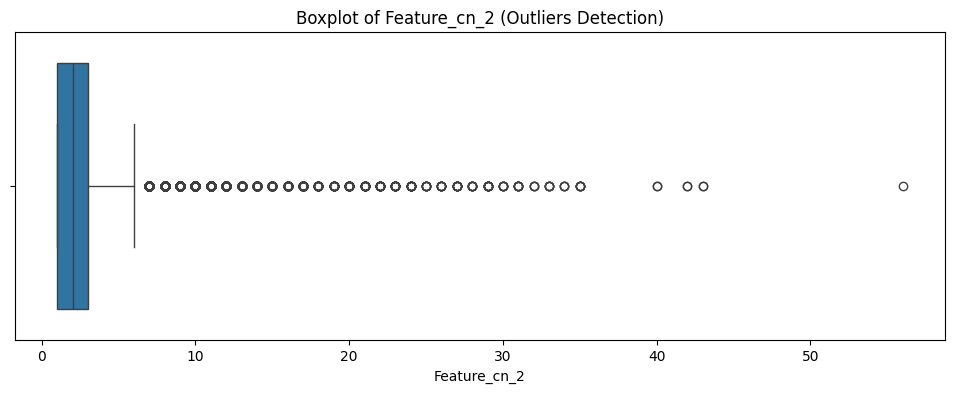

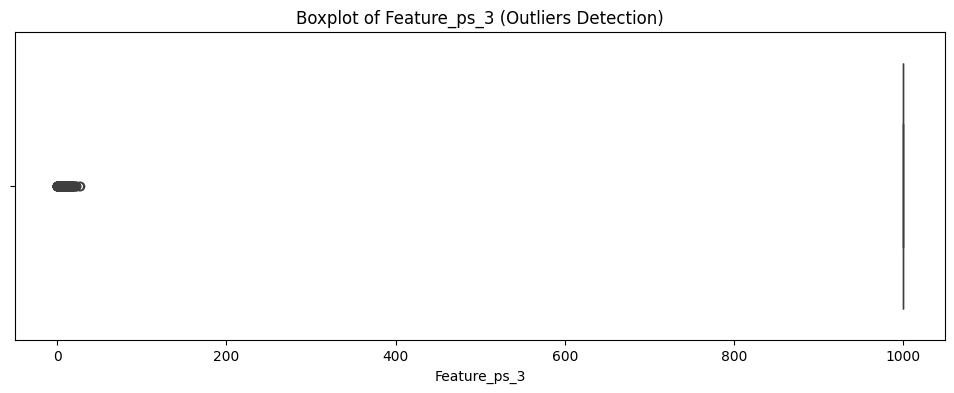

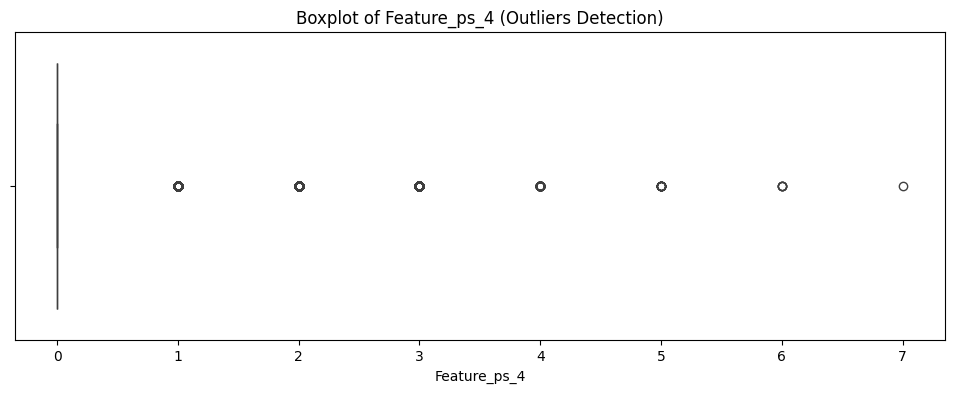

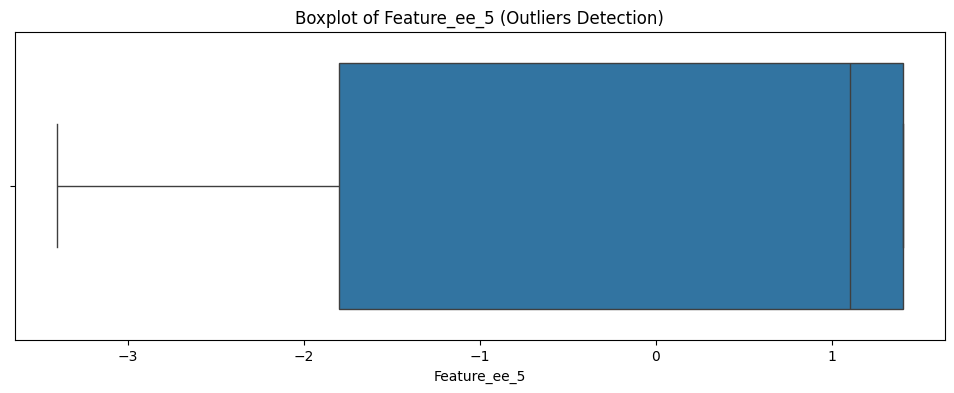

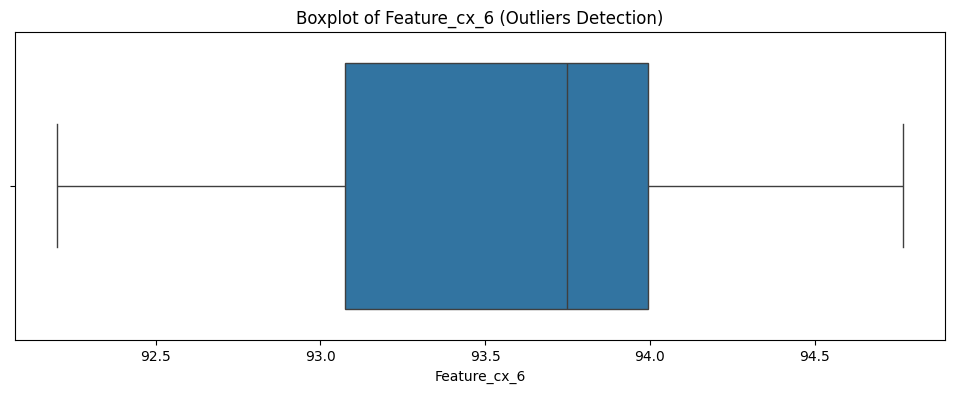

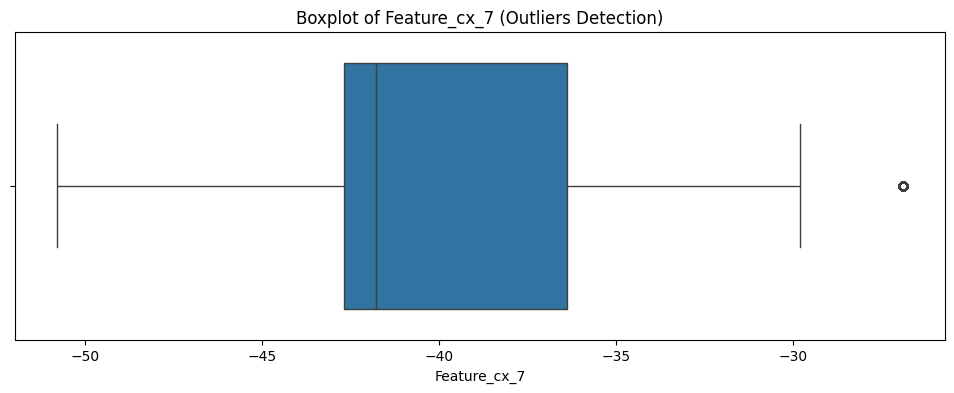

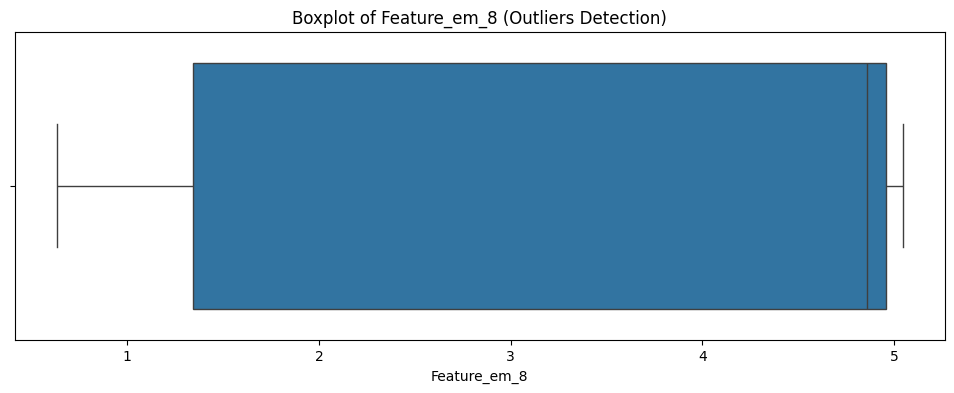

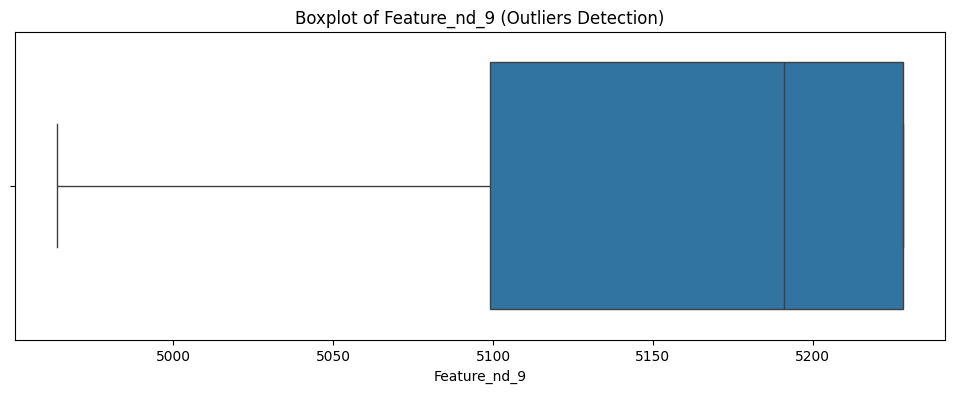

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select only numerical features (excluding target if numeric)
num_features = df.select_dtypes(include=['int64', 'float64']).columns.drop('Response', errors='ignore')

# Plot each numeric feature separately in landscape orientation
for col in num_features:
    plt.figure(figsize=(12, 4))  # wide (landscape) format
    sns.boxplot(x=df[col])       # horizontal boxplot
    plt.title(f"Boxplot of {col} (Outliers Detection)")
    plt.xlabel(col)
    plt.show()

In [10]:
outliers = {}

for col in num_features:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    outliers[col] = df[(df[col] < lower) | (df[col] > upper)][col]

# Example: show how many outliers each column has
for col, vals in outliers.items():
    print(f"{col}: {len(vals)} outliers")

Feature_ae_0: 402 outliers
Feature_dn_1: 2534 outliers
Feature_cn_2: 2036 outliers
Feature_ps_3: 1289 outliers
Feature_ps_4: 4808 outliers
Feature_ee_5: 0 outliers
Feature_cx_6: 0 outliers
Feature_cx_7: 376 outliers
Feature_em_8: 0 outliers
Feature_nd_9: 0 outliers


In [11]:
import numpy as np

outliers_z = {}

for col in num_features:
    mean = df[col].mean()
    std = df[col].std()
    z_scores = (df[col] - mean) / std
    outliers_z[col] = df[np.abs(z_scores) > 3][col]

for col, vals in outliers_z.items():
    print(f"{col}: {len(vals)} outliers (z-score > 4)")

Feature_ae_0: 312 outliers (z-score > 4)
Feature_dn_1: 734 outliers (z-score > 4)
Feature_cn_2: 734 outliers (z-score > 4)
Feature_ps_3: 1289 outliers (z-score > 4)
Feature_ps_4: 904 outliers (z-score > 4)
Feature_ee_5: 0 outliers (z-score > 4)
Feature_cx_6: 0 outliers (z-score > 4)
Feature_cx_7: 0 outliers (z-score > 4)
Feature_em_8: 0 outliers (z-score > 4)
Feature_nd_9: 0 outliers (z-score > 4)


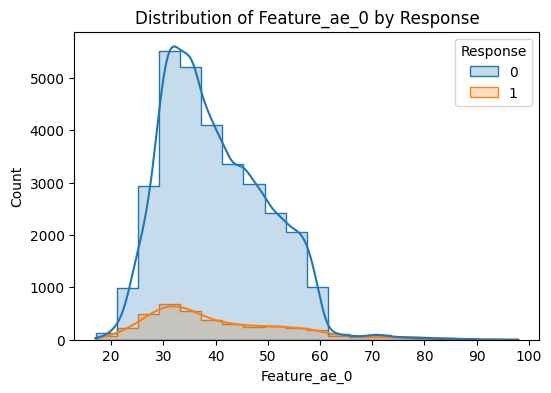

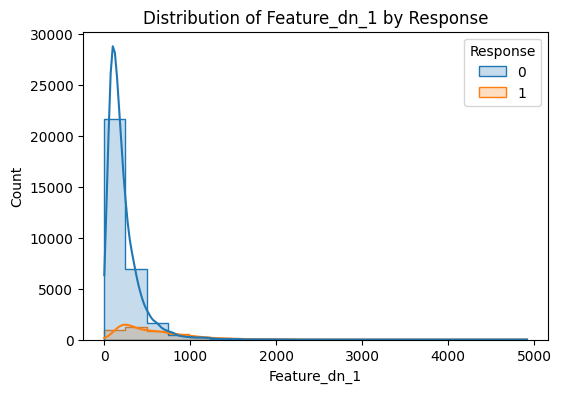

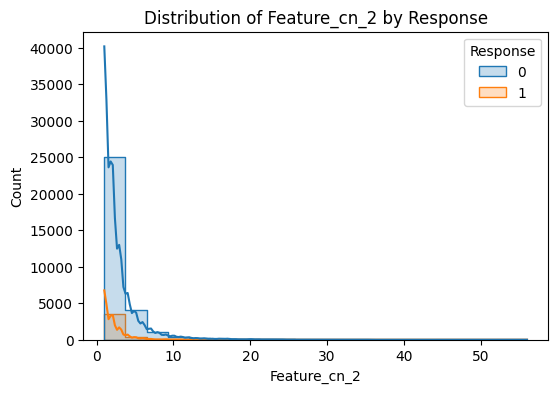

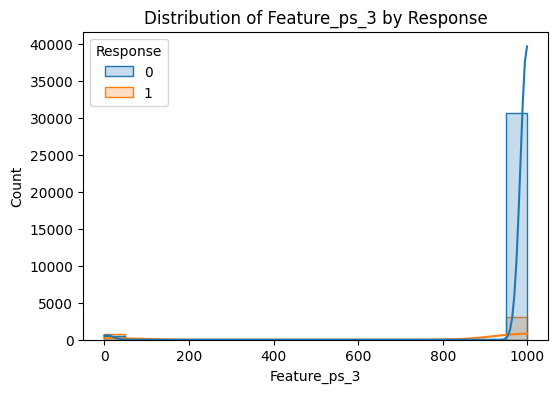

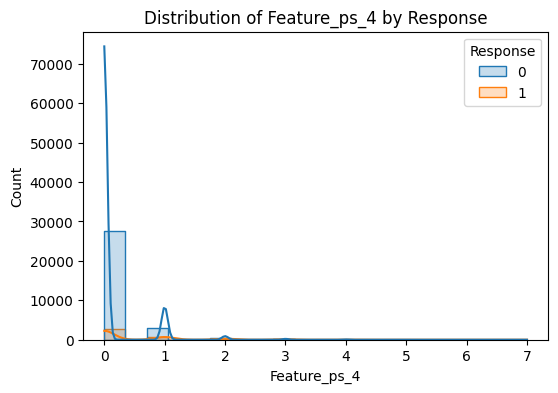

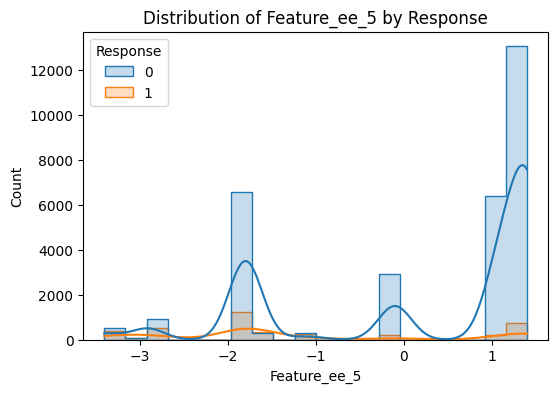

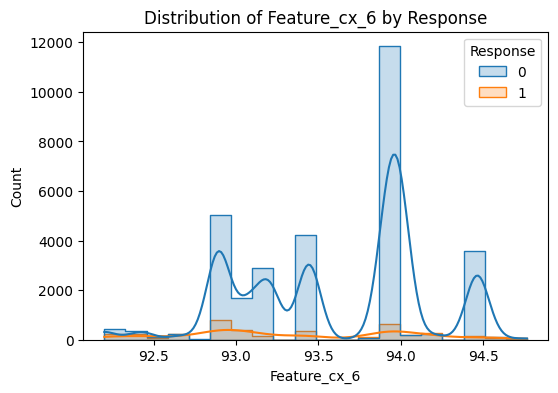

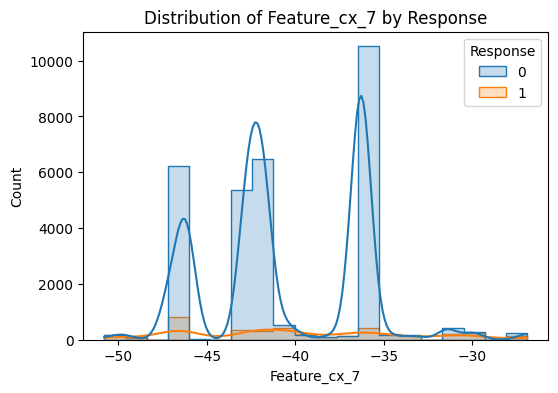

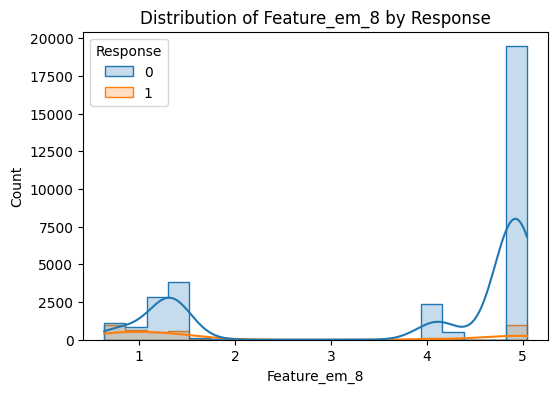

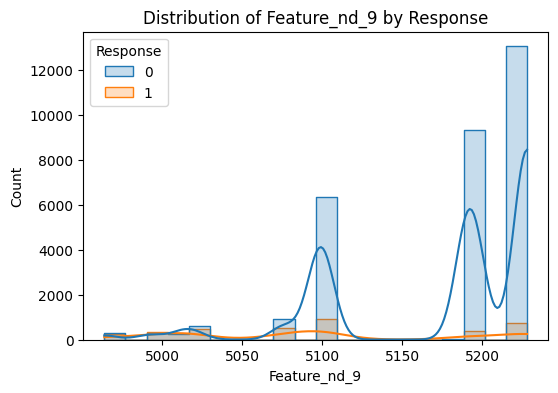

In [12]:
for col in num_features:
    plt.figure(figsize=(6,4))
    sns.histplot(data=df, x=col, hue='Response', kde=True, bins=20, element="step")
    plt.title(f"Distribution of {col} by Response")
    plt.show()

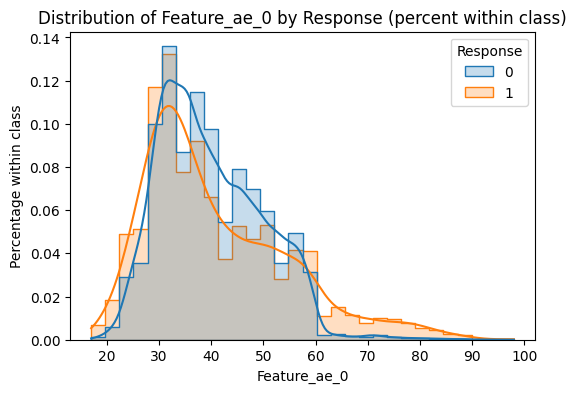

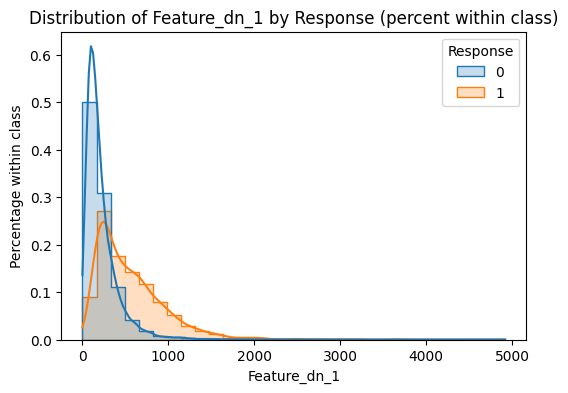

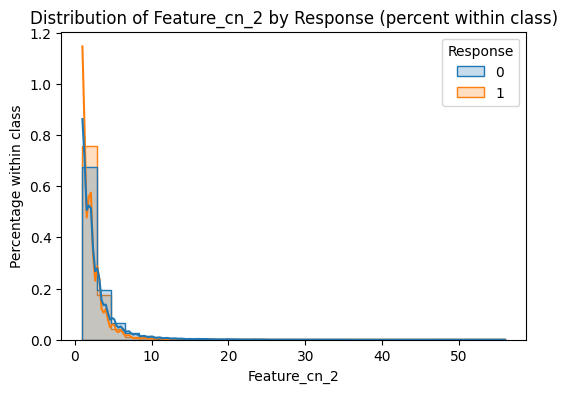

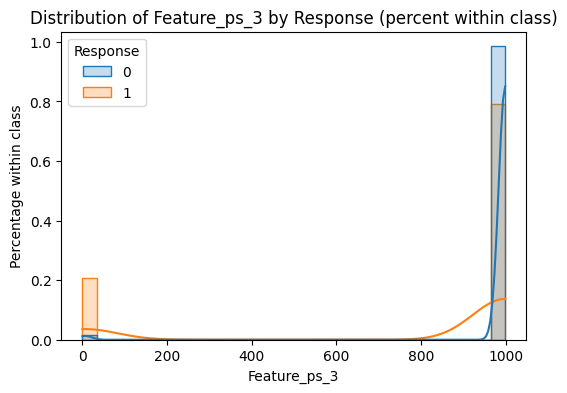

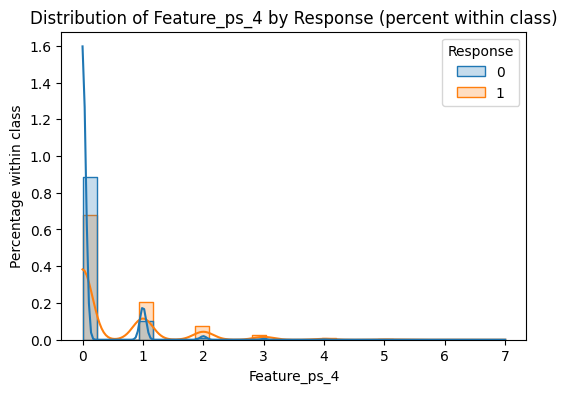

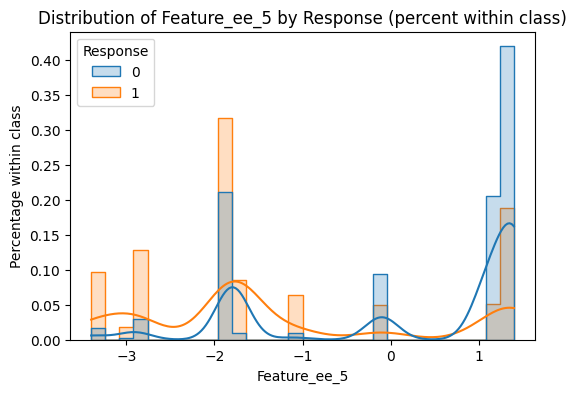

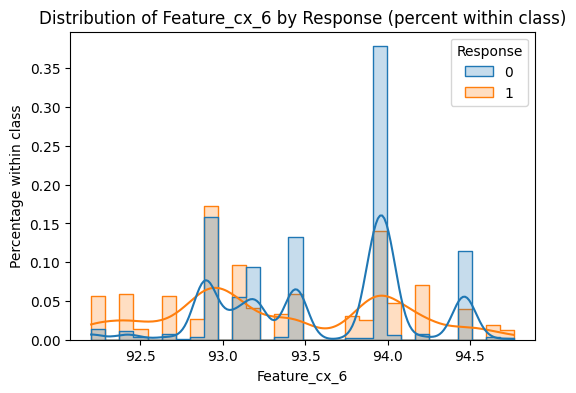

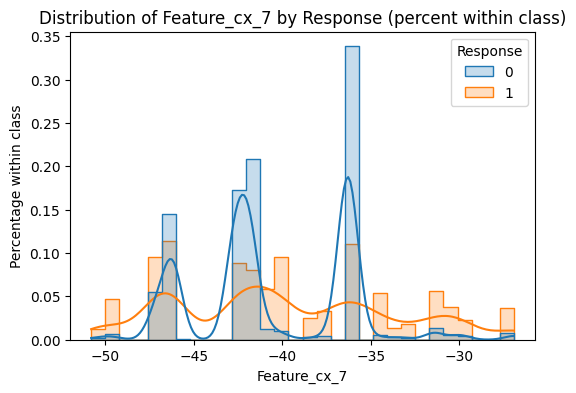

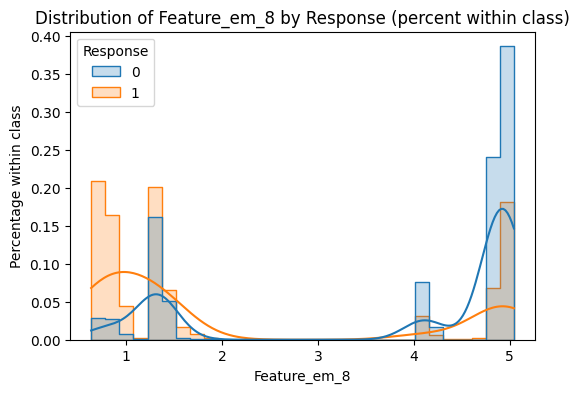

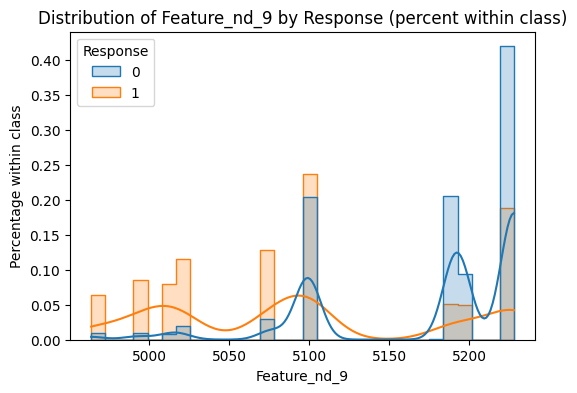

In [13]:
for col in num_features:
    plt.figure(figsize=(6,4))
    sns.histplot(
        data=df,
        x=col,
        hue="Response",
        kde=True,
        bins=30,
        element="step",
        stat="probability",  # ✅ probability per class
        common_norm=False    # ✅ each class normalized separately
    )
    plt.title(f"Distribution of {col} by Response (percent within class)")
    plt.ylabel("Percentage within class")
    plt.show()

In [14]:
df[df['Feature_cn_2'] > 22]['Response'].value_counts()

Response
0    98
1     1
Name: count, dtype: int64

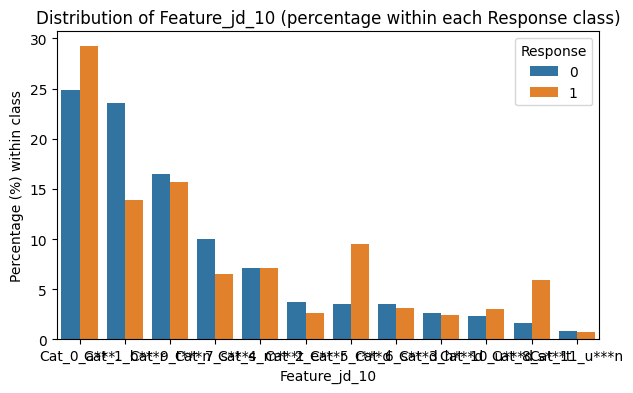

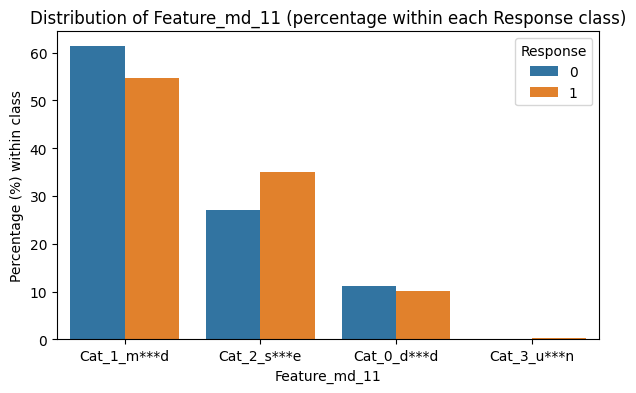

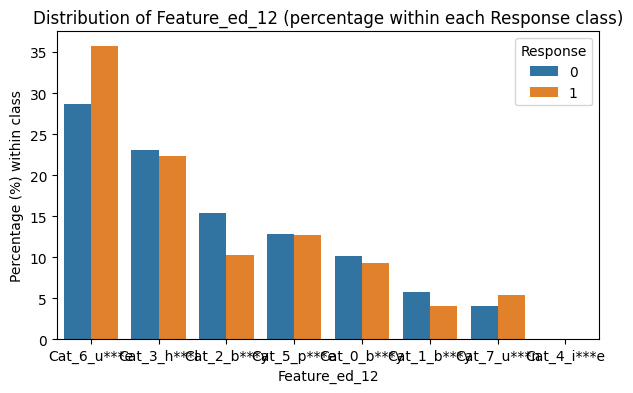

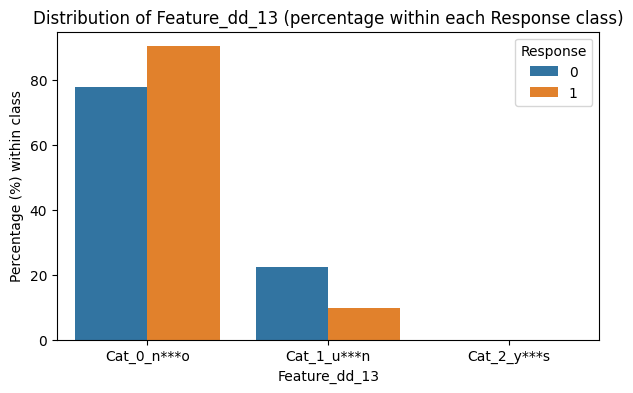

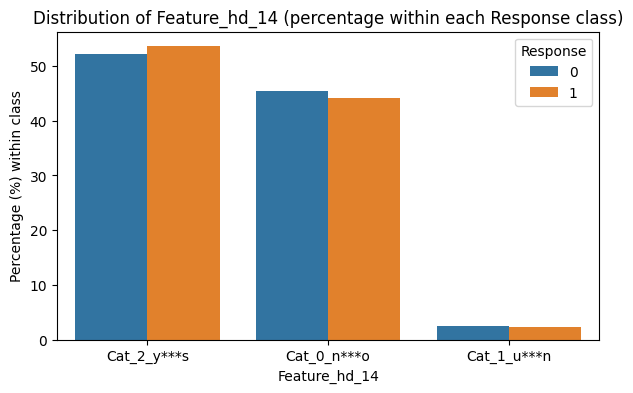

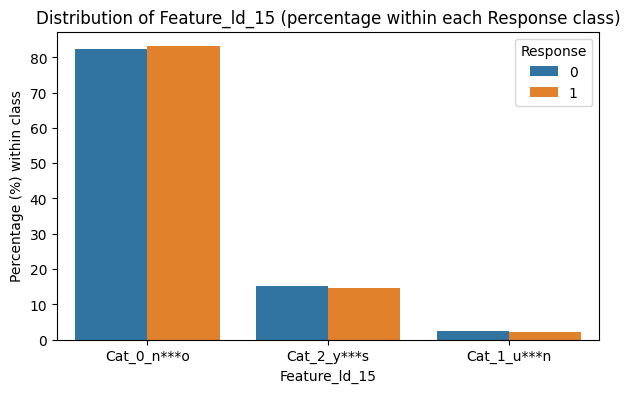

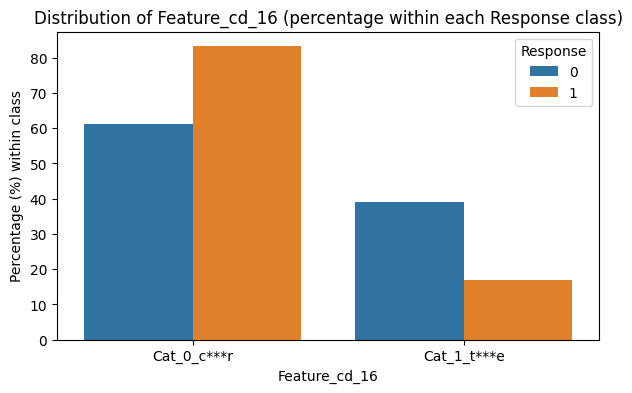

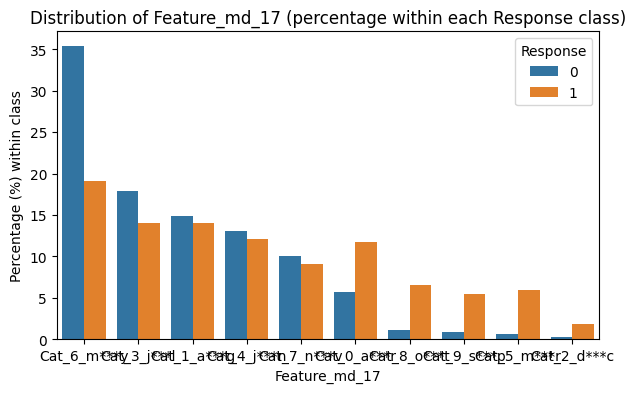

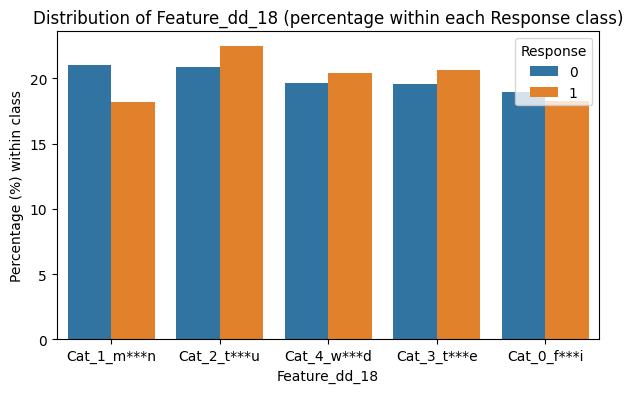

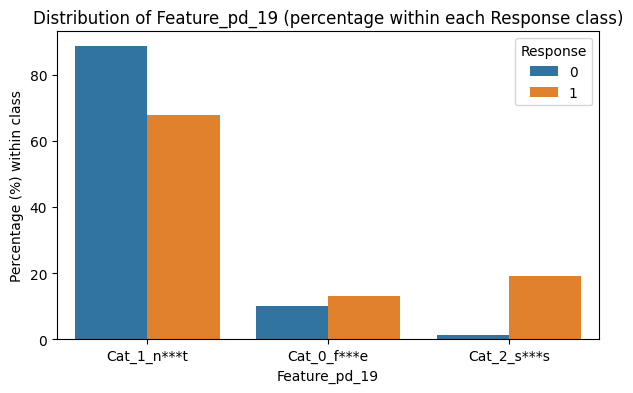

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select categorical features
cat_features = df.select_dtypes(include=['object', 'category']).columns

for col in cat_features:
    plt.figure(figsize=(7, 4))
    
    # Calculate percentages within each class
    prop = (
        df.groupby("Response")[col]
        .value_counts(normalize=True)   # normalize within Response
        .rename("proportion")
        .reset_index()
    )
    prop["percentage"] = prop["proportion"] * 100
    
    # Plot
    sns.barplot(
        data=prop,
        x=col,
        y="percentage",
        hue="Response"
    )
    
    plt.title(f"Distribution of {col} (percentage within each Response class)")
    plt.ylabel("Percentage (%) within class")
    plt.xlabel(col)
    plt.legend(title="Response")
    plt.show()

Insights: 

1. For 60 years old above, there is higher chance that it will not take the offer
2. Longer calls correlates to a person taking up the offer
3. Call attempts more than 20 almost results to a person not taking up the offer
4. It is more likely that a client accepts an offer if there is a campaign. Maybe we can just group this as no campaign (for 999) or with campaign.
5. If there were previous call attempts on the last campaign, it is likely for the customer to take the offer. 
6. Negative variation rate has more accepted offers? 
7. Lesser negative consumer price index has more accepted offers. 
8. Lower interbank rate has more accepted offers. 
9. Lower number of employees, more accepted offers. 

There are no missing values in the dataset.

### 3.2. Encoding Categorical Variables
Categorical variables need to be converted into a numerical format for the model to understand them. We will use one-hot encoding for this purpose.

In [16]:
categorical_features = [col for col in df.columns if df[col].dtype == 'object']
df_encoded = pd.get_dummies(df, columns=categorical_features, drop_first=True)
df_encoded.head()

,Feature_ae_0,Feature_dn_1,Feature_cn_2,Feature_ps_3,Feature_ps_4,Feature_ee_5,Feature_cx_6,Feature_cx_7,Feature_em_8,Feature_nd_9,...,Feature_md_17_Cat_6_m***y,Feature_md_17_Cat_7_n***v,Feature_md_17_Cat_8_o***t,Feature_md_17_Cat_9_s***p,Feature_dd_18_Cat_1_m***n,Feature_dd_18_Cat_2_t***u,Feature_dd_18_Cat_3_t***e,Feature_dd_18_Cat_4_w***d,Feature_pd_19_Cat_1_n***t,Feature_pd_19_Cat_2_s***s
0,57,371,1,999,1,-1.8,92.893,-46.2,1.299,5099.1,...,True,False,False,False,True,False,False,False,False,False
1,55,285,2,999,0,1.1,93.994,-36.4,4.860,5191.0,...,True,False,False,False,False,True,False,False,True,False
2,33,52,1,999,1,-1.8,92.893,-46.2,1.313,5099.1,...,True,False,False,False,False,False,False,False,False,False
3,36,355,4,999,0,1.4,94.465,-41.8,4.967,5228.1,...,False,False,False,False,False,False,False,False,True,False
4,27,189,2,999,0,1.4,93.918,-42.7,4.963,5228.1,...,False,False,False,False,False,False,False,False,True,False


### 3.3. Feature Scaling
We will scale the numerical features to have a mean of 0 and a standard deviation of 1. This is important for models like Logistic Regression that are sensitive to the scale of the features.

In [17]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
numerical_features = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
numerical_features.remove('Response')
df_encoded[numerical_features] = scaler.fit_transform(df_encoded[numerical_features])
df_encoded.head()

,Feature_ae_0,Feature_dn_1,Feature_cn_2,Feature_ps_3,Feature_ps_4,Feature_ee_5,Feature_cx_6,Feature_cx_7,Feature_em_8,Feature_nd_9,...,Feature_md_17_Cat_6_m***y,Feature_md_17_Cat_7_n***v,Feature_md_17_Cat_8_o***t,Feature_md_17_Cat_9_s***p,Feature_dd_18_Cat_1_m***n,Feature_dd_18_Cat_2_t***u,Feature_dd_18_Cat_3_t***e,Feature_dd_18_Cat_4_w***d,Feature_pd_19_Cat_1_n***t,Feature_pd_19_Cat_2_s***s
0,1.627296,0.437620,-0.564504,0.195541,1.669270,-1.197107,-1.180196,-1.229660,-1.338069,-0.941359,...,True,False,False,False,True,False,False,False,False,False
1,1.435504,0.105040,-0.203152,0.195541,-0.350939,0.648759,0.722841,0.891606,0.714885,0.332006,...,True,False,False,False,False,True,False,False,True,False
2,-0.674202,-0.796021,-0.564504,0.195541,1.669270,-1.197107,-1.180196,-1.229660,-1.329998,-0.941359,...,True,False,False,False,False,False,False,False,False,False
3,-0.386515,0.375745,0.519552,0.195541,-0.350939,0.839711,1.536947,-0.277255,0.776572,0.846063,...,False,False,False,False,False,False,False,False,True,False
4,-1.249576,-0.266213,-0.203152,0.195541,-0.350939,0.839711,0.591478,-0.472065,0.774266,0.846063,...,False,False,False,False,False,False,False,False,True,False


## 4. Model Training and Evaluation

### 4.1. Train-Test Split

In [18]:
from sklearn.model_selection import train_test_split

# Features and target
X = df_encoded.drop('Response', axis=1)
y = df_encoded['Response']

# Train (70%) / Temp (30%)
X_train, X_temp, y_train, y_temp = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Validation (15%) / Test (15%) from the Temp set
X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp
)

print("Train size:", X_train.shape[0])
print("Validation size:", X_val.shape[0])
print("Test size:", X_test.shape[0])


Train size: 28000
Validation size: 3500
Test size: 3500


In [27]:
# import piplite
# await piplite.install('lazypredict')
# import lazypredict
from lazypredict.Supervised import LazyClassifier

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=.5,random_state =123)

clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)
models,predictions = clf.fit(X_train, X_test, y_train, y_test)

print(models)

ImportError: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html

### 4.2. Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(random_state=42, max_iter=1000)
log_reg.fit(X_train, y_train)

### 4.3. Random Forest Classifier (Non-linear model)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(random_state=42)
rf_clf.fit(X_train, y_train)

### 4.4. Model Comparison

In [ ]:
from sklearn.metrics import roc_auc_score, f1_score, confusion_matrix, classification_report

models = {
    'Logistic Regression': log_reg,
    'Random Forest': rf_clf
}

for name, model in models.items():
    y_pred = model.predict(X_test)
    print(f"\n{name}:")
    print(f"  ROC-AUC: {roc_auc_score(y_test, y_pred):.4f}")
    print(f"  F1-Score: {f1_score(y_test, y_pred):.4f}")
    print("\nClassification Report:\n", classification_report(y_test, y_pred))
    print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


The Random Forest model performs better than the Logistic Regression model, so we will choose it as our final model.

## 5. Answering the Case Study Questions

### Feature Importance

In [ ]:
importances = rf_clf.feature_importances_
feature_importance_df = pd.DataFrame({'feature': X.columns, 'importance': importances}).sort_values(by='importance', ascending=False)
print("Feature Importances:")
print(feature_importance_df)

## 6. Bonus Question

In [ ]:
tn, fp, fn, tp = confusion_matrix(y_test, rf_clf.predict(X_test)).ravel()
total = tn + fp + fn + tp

# Proportions from the confusion matrix
tn_prop = tn / total
fp_prop = fp / total
fn_prop = fn / total
tp_prop = tp / total

# Number of customers in the new campaign
campaign_customers = 10000

# Expected numbers for the new campaign
exp_tn = tn_prop * campaign_customers
exp_fp = fp_prop * campaign_customers
exp_fn = fn_prop * campaign_customers
exp_tp = tp_prop * campaign_customers

# Risk distribution
high_risk_prop = 0.10
medium_risk_prop = 0.25
low_risk_prop = 0.65

# Profit values
profit_high_taken = 285.00
profit_high_not_taken = 300.00
profit_medium_taken = 705.00
profit_medium_not_taken = 300.00
profit_low_taken = 1225.00
profit_low_not_taken = 300.00

# a) Expected net profit
tp_high_profit = exp_tp * high_risk_prop * profit_high_taken
tp_medium_profit = exp_tp * medium_risk_prop * profit_medium_taken
tp_low_profit = exp_tp * low_risk_prop * profit_low_taken

fp_high_profit = exp_fp * high_risk_prop * profit_high_not_taken
fp_medium_profit = exp_fp * medium_risk_prop * profit_medium_not_taken
fp_low_profit = exp_fp * low_risk_prop * profit_low_not_taken

expected_profit = (tp_high_profit + tp_medium_profit + tp_low_profit) - (fp_high_profit + fp_medium_profit + fp_low_profit)
print(f'a) Expected Net Profit: {expected_profit:.2f}')

# b) Lost opportunity
fn_high_profit = exp_fn * high_risk_prop * profit_high_taken
fn_medium_profit = exp_fn * medium_risk_prop * profit_medium_taken
fn_low_profit = exp_fn * low_risk_prop * profit_low_taken

lost_opportunity = fn_high_profit + fn_medium_profit + fn_low_profit
print(f'b) Lost Opportunity of Net Profit: {lost_opportunity:.2f}')